In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 加载数据
data = pd.read_csv('./combined_data.csv')

# 删除不需要的列，例如时间戳或IP地址（假设你的数据集中有这些列）
data.drop([' Timestamp'], axis=1, inplace=True)

# 类型转换，将分类标签编码
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# 检查并处理无穷大和非常大的数值
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # 将inf替换为NaN
data.fillna(data.median(), inplace=True)  # 使用中位数填充NaN，确保之前中位数计算不包括inf

# 特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(' Label', axis=1))  # 确保标签列不参与标准化
y = data[' Label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("数据预处理完成，准备进行模型训练和测试。")


数据预处理完成，准备进行模型训练和测试。


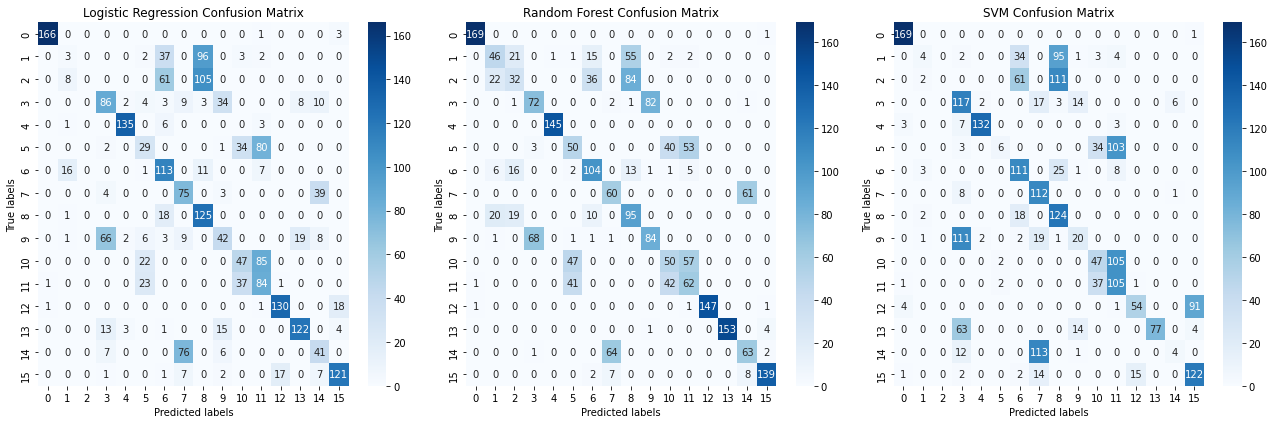

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 初始化模型
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

# 训练模型
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# 预测结果
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# 混淆矩阵
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# 绘制混淆矩阵的热图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_rf, annot=True, fmt="d", ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_svm, annot=True, fmt="d", ax=axes[2], cmap='Blues')
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.savefig("confusion.png")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 初始化模型
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

# 训练模型
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# 预测结果
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# 混淆矩阵
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# 绘制混淆矩阵的热图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_rf, annot=True, fmt="d", ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_svm, annot=True, fmt="d", ax=axes[2], cmap='Blues')
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()
